Zbiór danych: zarobki.dat. Część wykresów w poniższej analizie pochodzi z pakietu Statistica. 

Opis zmiennych:

<ul>
<li><b>sx</b> - płeć, 1 -> kobieta , 0 -> męźczyzna</li>
<li><b>rk</b> - ranga, stanowisko, 1 (assistant)-> adiunkt, 2 (associate )-> profesor nadzwyczajny, 3 (full) -> profesor zwyczajny </li>
<li><b>yr</b> - ilość lat na bieżącym stanowisku</li>
<li><b>dg</b> - stopień akademicki, 1 -> doktorat, 0 -> studia magisterskie</li>
<li><b>yd</b> - ilość lat od posiadania danego tytułu akademickiego</li>
<li><b>sl</b> - roczne wynagrodzenie</li>
</ul>


In [50]:
# import pakietów wykorzystywanych w analizie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np
from IPython.display import Image
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from sklearn import metrics

In [2]:
#wczytanie danych
zarobki = pd.read_csv('zarobki.dat', delim_whitespace=True)  

In [3]:
zarobki

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696
5,male,full,16,doctorate,21,28516
6,female,full,0,masters,32,24900
7,male,full,16,doctorate,18,31909
8,male,full,13,masters,30,31850
9,male,full,13,masters,31,32850


In [4]:
# sprawdzenie typów danych 
zarobki.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [5]:
#sprawdzenie, czy są brakujące wartości 
zarobki.isnull().values.any()

False

In [6]:
# zamiana wartości object na numeryczne wg opisu danych  
zarobki['sx'] = zarobki.apply(lambda x: 0 if x.sx == 'male' else 1, axis=1)
zarobki['dg'] = zarobki.apply(lambda x: 1 if x.dg == 'doctorate' else 0, axis=1)

zarobki['rk'] = zarobki.apply(lambda x: 1 if x.rk == 'assistant' else (2 if x.rk == 
                                                                                 'associate' else 3),
                              axis=1)


In [7]:
# dane po zamianie wartości 
zarobki

,sx,rk,yr,dg,yd,sl
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [8]:
# zapis w celu wczytania do statistica danych numerycznych 
zarobki.to_csv (r'zarobki_num.csv', index = False, header=True)

In [58]:
# funkcja przyjmująca na wejściu p_value danej zmiennej i zwracająca string z wynikiem hipotezy przy poziomie istotności
# alfa = 0.05
def rozklad_normalny(p):
    alfa = 0.05
    if p > alfa:
        print('Dane pochodzą z rozkładu normalnego. Brak podstaw do odrzucenia hipotrzy zerowej przy poziomie istotności alfa 0.05. ')
    else:
        return print('Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.')


In [59]:
#sprawdzenie rozkładów normalnych 


stat, p_sx = shapiro(zarobki.sx)
print('Zmienna sx: p-value=%.3f' % (p_sx))
rozklad_normalny(p_sx)
    
stat, p_rk = shapiro(zarobki.rk)
print('Zmienna rk: p-value=%.3f' % (p_rk))
rozklad_normalny(p_rk)

stat, p_yr = shapiro(zarobki.yr)
print('Zmienna yr: p-value=%.3f' % (p_yr))
rozklad_normalny(p_yr)

stat, p_dg = shapiro(zarobki.dg)
print('Zmienna dg: p-value=%.3f' % (p_dg))
rozklad_normalny(p_dg)

stat, p_yd = shapiro(zarobki.yd)
print('Zmienna yd: p-value=%.3f' % (p_yd))
rozklad_normalny(p_yd)

stat, p_sl = shapiro(zarobki.sl)
print('Zmienna sl: p-value=%.3f' % (p_sl))
rozklad_normalny(p_sl)

Zmienna sx: p-value=0.000
Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.
Zmienna rk: p-value=0.000
Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.
Zmienna yr: p-value=0.012
Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.
Zmienna dg: p-value=0.000
Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.
Zmienna yd: p-value=0.019
Dane nie pochodzą z rozkładu normalnego. Odrzucamy hipotezę zerową przy poziomie istotności alfa 0.05.
Zmienna sl: p-value=0.053
Dane pochodzą z rozkładu normalnego. Brak podstaw do odrzucenia hipotrzy zerowej przy poziomie istotności alfa 0.05. 


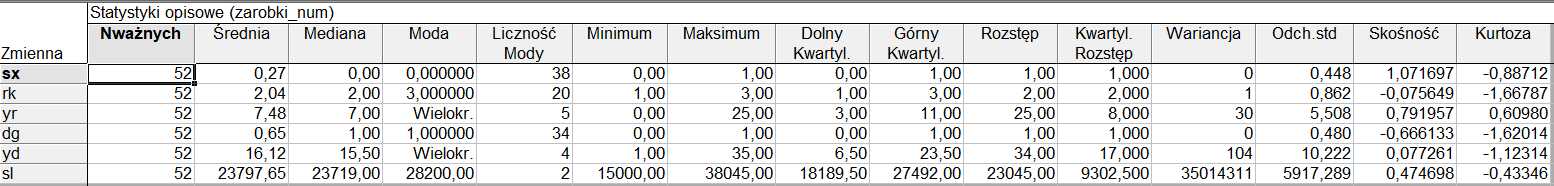

In [14]:

Image(filename='statystyki_opisowe.png')

Wnioski z powyższej tabeli:
Na podstawie opisu zmiennych, można przypuszczać, że wartości minimalne i maksymalne są wartościami realymi, tj.
nie wymagają dodatkowego sprawdzenia.  


Sx, rk, dg są zmiennymi dyskretnymi.
Yr, yd, sl - zmienne ciągłe. 
    
W przypadku zmiennej sx (płeć) dominującą wartością w próbie jest 0 - męźczyzna z licznością 38 na 52 badanych.
Mediana również wynosi 0.
Zmienna nie pochodzi z rozkładu normalnego. 

Zmienna rk (ranga) - dominującą wartością jest 3 - profesor zwyczajny z licznością 20 osób. 
Mediana wynosi 2. Zmienna nie pochodzi z rozkładu normalnego. 

Zmienna dg - dominująca wartość 1 - doktorat z licznością 34 osób. Mediana również wynosi 1.
Zmienna nie pochodzi z rozkładu normalnego. 

Zmienna yr (ilość lat na bieżącym stanowisku). Zmienna nie pochodzi z rozkładu normalnego.
Różnica pomiędzy największą liczbą lat na stanowisku a najmniejszą jest równa 25. Maksymalna wartość wynosi 25 lat,
natomiast minimalna 0. 25% osób jest 3 lata, bądź mniej na bieżącym stanowisku. 75% osób jest 11 lat lub mniej na bieżącym
stanowisku. 50% badanych jest poniżej 7 lat na bieżącym stanowisku, a druga połowa powyżej 7 lat.  

Zmienna yd (ilość lat od posiadania danego tytułu akademickiego). Zmienna nie pochodzi z rozkładu normalnego. 
Różnica pomiędzy maksymalną wartością posiadania danego tytułu akademickiego, a najmniejszą 
jest równa 34 lata. Maksymalną wartością jest 35 lat, a minimalną 1 rok. 25% badanych 6.5 lat bądż mniej posiada dany tytuł 
akademicki. 75% posiada 23.5 lat bądź mniej dany tytuł akademicki. 50% z próby ma mniej niż 15.5 lat dany tytuł, a druga połowa ma więcej niż 15.5 lat dany tytuł. 

Zmienna sl (roczne wynagrodzenie). Zmienna pochodzi z rozkładu normalnego. Średnia z danych jest równa 23 797,65, 
a odchylenie standardowe od niej +/- 3 * 5917,65.  
Maksymalna wartość 38045,00. Różnica pomiędzy najlepiej a najgorzej zarabiającą osobą wynosi 23045,00.
25% osób zarabia 18 189.5 bądź mniej, 75% badanych osób zarabia 27 492 bądź mniej. 50% zarabia mmniej niż 23 719,
natomiast druga połowa więcej niż 23 719. 

    


Poniżej wykresy zmiennych ramka-wąsy.

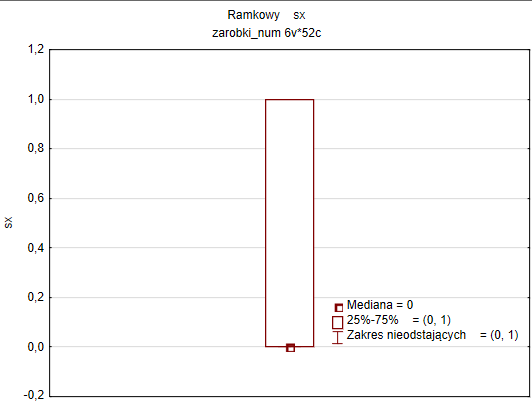

In [17]:
Image(filename='ramkowy_sx.png')
# mediana = 0 

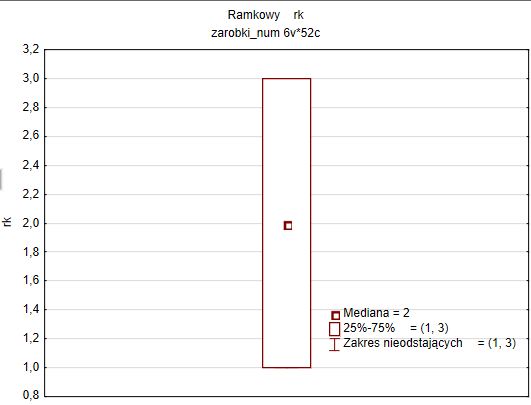

In [18]:
Image(filename='ramkowy_rk.png')
# mediana = 2

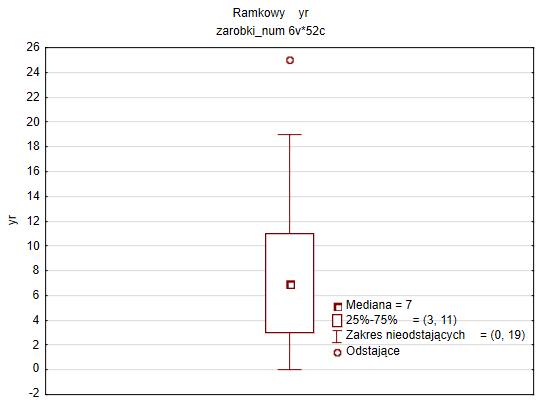

In [19]:
Image(filename='ramkowy_yr.png')
# mediana = 7. jedna obserwacja odstająca 25. 

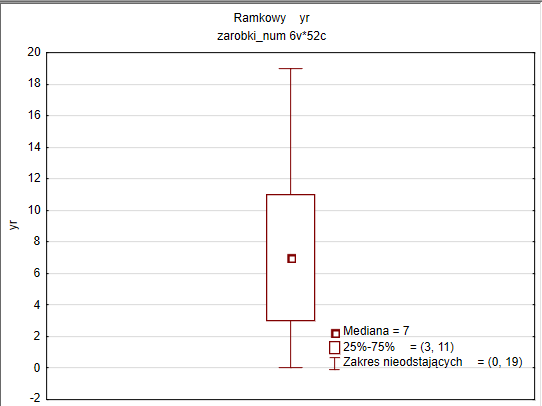

In [20]:
Image(filename='ramkowy_yr_BezOds.png')
# po wyłączeniu obserwacji odstającej z danych, rozkład się nie zmienił tj dominanta, kwartyle 

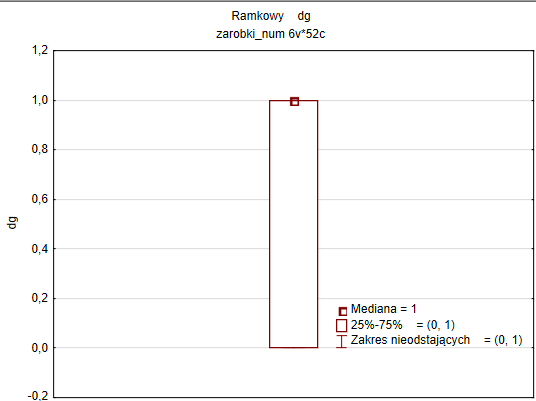

In [21]:
Image(filename='ramkowy_dg.png')
# mediana = 1.  

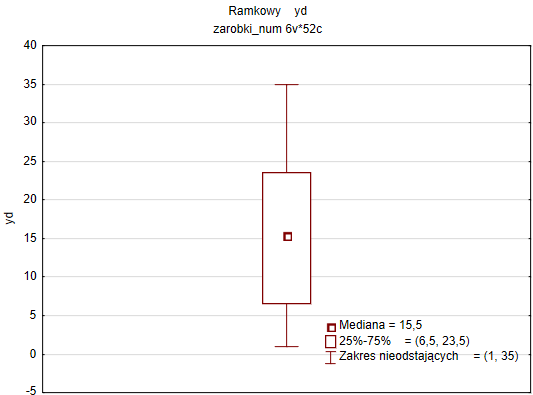

In [22]:
Image(filename='ramkowy_yd.png')
# mediana 15,5 . brak obserwacji odstających , rozkład w miarę symetryczny s

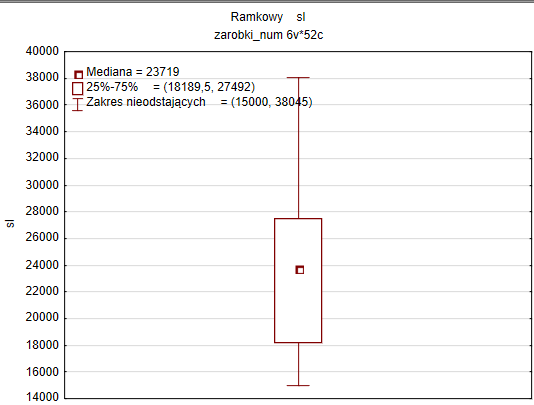

In [23]:
Image(filename='ramkowy_sl.png')
# mediana 23 719 $, brak obsrwacji odstającyh, rozkład raczej symetryczny, 
# chociaż trochę więcej osób zarabia mniej , w dolnej części wykresu 

Poniżej histogramy poszczególnych zmiennych

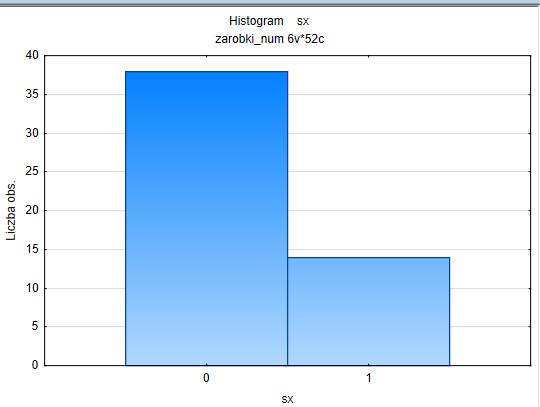

In [24]:
#zarobki.hist(bins=10, figsize=(25, 20))
Image(filename='histogram_sx.png')
# rozkład jednomodalny, moda = 0 (mężczyzna), rozkład w miarę symetryczny, skośność i kurtoza < 3 . 
#lekko prawostronnie skośny.

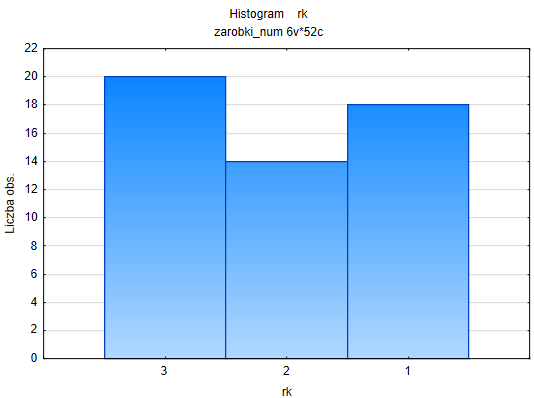

In [25]:
Image(filename='histogram_rk.png')
# rozkład jednomodalny, moda = 3 . rozkład symetryczny

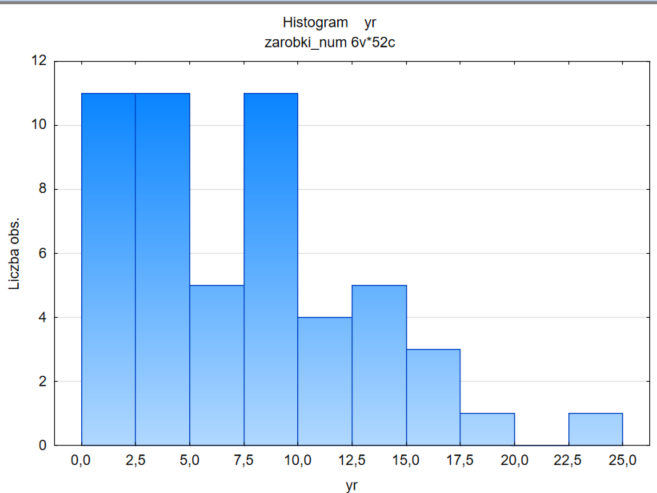

In [26]:
Image(filename='histogram_yr.png')
# rozkad wielomodalny 

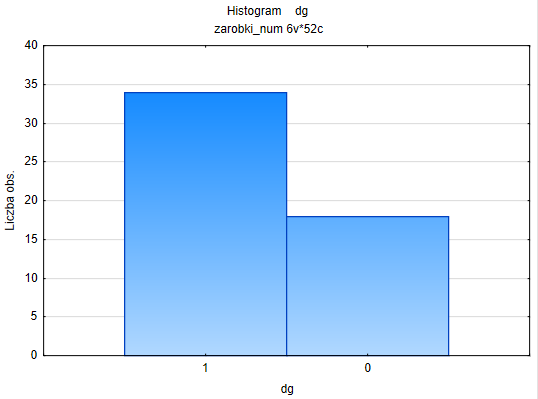

In [27]:
Image(filename='histogram_dg.png')
# rozkład jednomodalny , moda = 1, rozkład w miarę symetryczny, skośność i kurtoza < 3 . 
#lekko lewostronnie skośny 

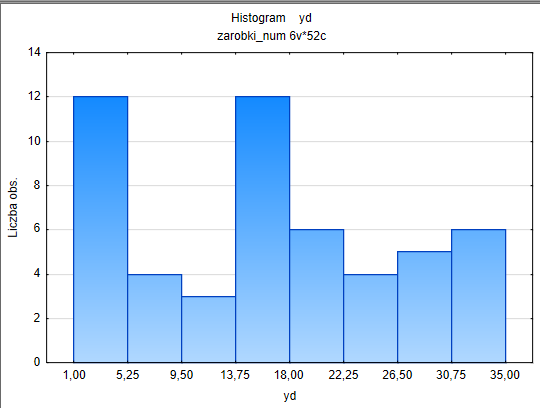

In [28]:
Image(filename='histogram_yd.png')
# rozkład dwumodalny 

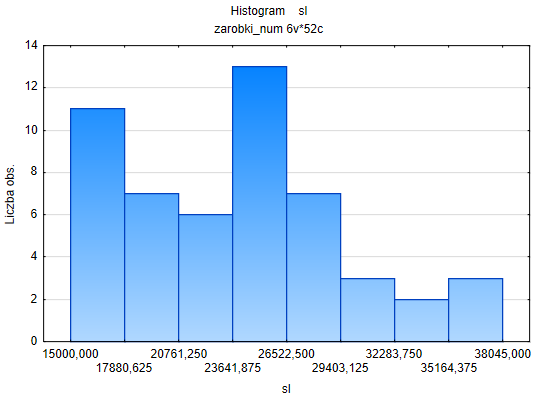

In [29]:
Image(filename='histogram_sl.png')
# rozkład dwumodalny

In [ ]:
# poniżej wykresu rozrzutu dla poszczególnych danych 

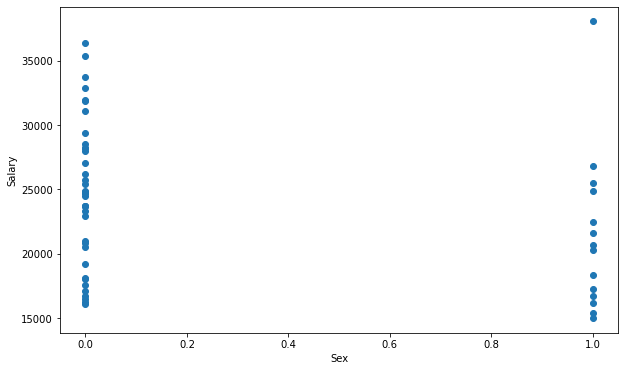

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = zarobki['sx'], y = zarobki['sl'])
plt.xlabel("Sex")
plt.ylabel("Salary")

plt.show()

# w przypadku mężczyzn roczne zarobki są bardziej równomiernie rozłożone, niż kobiet, kobiety mają mniejsze zarobki i
#badziej skumulowany wykres w dolnym zakresie 

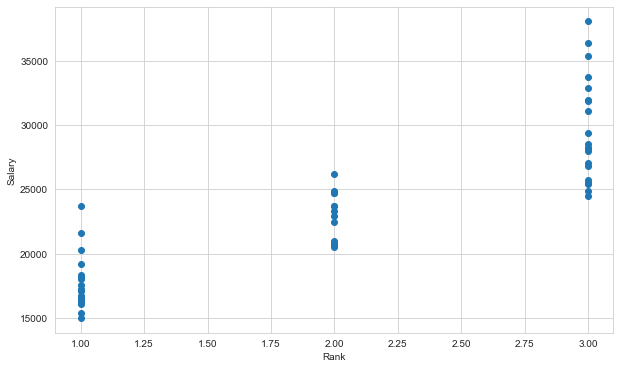

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = zarobki['rk'], y = zarobki['sl'])
plt.xlabel("Rank")
plt.ylabel("Salary")

plt.show()
# w miarę wzrostu rangi zarobki rosną, najmniej się pokrywa ranga = 3 z pozostałmi wartościami   

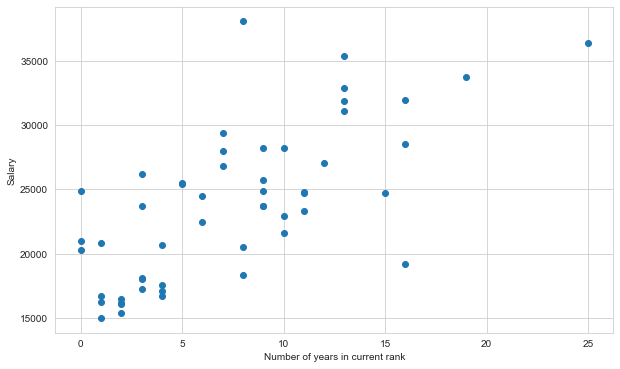

In [161]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = zarobki['yr'], y = zarobki['sl'])
plt.xlabel("Number of years in current rank")
plt.ylabel("Salary")

plt.show()

# w miarę wzrostu ilości lat na bieżącym stanowisku zarobki wzrastają , chociaż ze sporym rozrzutem 

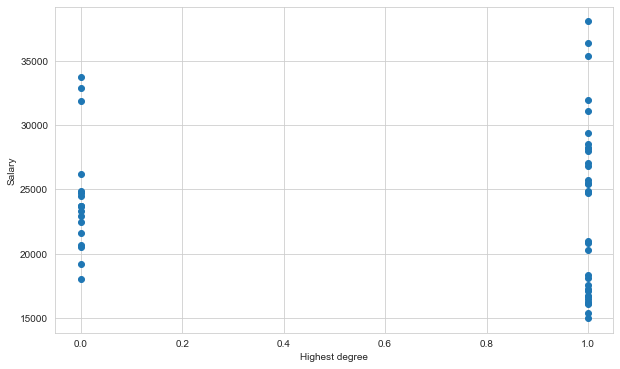

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = zarobki['dg'], y = zarobki['sl'])
plt.xlabel("Highest degree")
plt.ylabel("Salary")

plt.show()

# w przypadku posiadania doktoratu zarobki są bardziej różnorodne, w przypadku studiów magisterskich bardziej 
#skumulowane do 26 000 

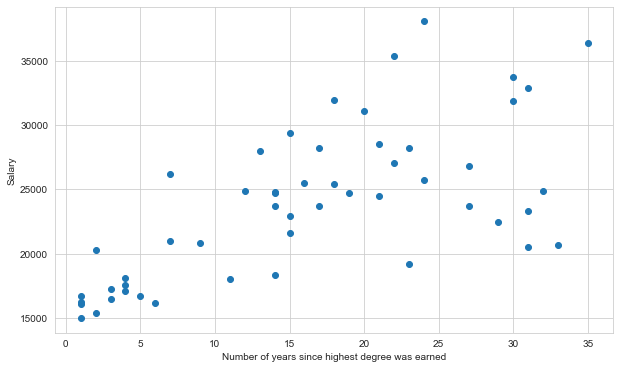

In [163]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = zarobki['yd'], y = zarobki['sl'])
plt.xlabel("Number of years since highest degree was earned")
plt.ylabel("Salary")

plt.show()

# w miarę wzrostu lat posiadając dany tytuł akademicki zarobki rosną, ale są mocno różnorodne z biegiem lat,
# w początkowych latach są one zauważalnie niższe 

In [72]:
# porównanie średnich w dwóch grupach 
# H0 => średnie zarobki są równe w przypadku kobiet i męźczyzn 
# H1 => średnie zarobki nie są równe


kobiety = zarobki[zarobki['sx']==1]
mezczyzni = zarobki[zarobki['sx']==0]

ttest_ind(kobiety['sl'], mezczyzni['sl'])

Przy poziomie istotności alfa 0.05 nie ma podstaw do odrzucenia hipotezy zerowej o równości średnich. 

Ttest_indResult(statistic=-1.8474402832932844, pvalue=0.07060393644390568)

In [52]:
# Model regresji liniowej. Zmienną objaśnianą będzie sl, tj. roczne zarobki.

#oddzielenie zbioru danych od zmiennej sl, i przypisanie do X
X = zarobki.iloc[:,:-1]

In [53]:
X

,sx,rk,yr,dg,yd
0,0,3,25,1,35
1,0,3,13,1,22
2,0,3,10,1,23
3,1,3,7,1,27
4,0,3,19,0,30
5,0,3,16,1,21
6,1,3,0,0,32
7,0,3,16,1,18
8,0,3,13,0,30
9,0,3,13,0,31


In [54]:
# zmienna sal przypisanie do y
y = zarobki.iloc[:,-1:]

In [55]:
y

,sl
0,36350
1,35350
2,28200
3,26775
4,33696
5,28516
6,24900
7,31909
8,31850
9,32850


In [56]:
# podział danych na zbiór treningowy i testowy (2/3 i 1/3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
#przypisanie modelu do zmiennej 
linR = linear_model.LinearRegression()


In [58]:
#trenowanie modelu na zbiorze treningowym 
linR.fit(X_train, y_train)

LinearRegression()

In [59]:
# przypisanie wyników modelu na zbiorze treningowym do zmiennej y_pred
y_pred = linR.predict(X_test)

In [60]:
# sprawdzenie na zbiorze testowym modelu , r2 - współczynnik determinacji, miara jakości dopasowania modelu, od 0-1
r_kwadrat = linR.score(X_test,y_test)

In [61]:
# model został poprawnie dopasowany w 79%. 
r_kwadrat

0.7903254882748605

In [62]:
# wyraz wolny
linR.intercept_

array([10591.56766904])

In [63]:
#współczynniki b zmienych
linR.coef_

array([[ 2483.20823299,  6457.39519508,   495.75962834, -1574.80281884,
         -186.12066411]])

In [64]:
#przykład równania z powyższymi wyliczeniami
#pensja = 10591.56766904 + 2483.20823299 * płeć 

NameError: name 'płeć' is not defined

In [ ]:
#dalsze możliwe kroki:
    
#zbiór danych jest mały jak i liczba zmiennych,ale można by było zrobić klasteryzajce, 
#zobaczyć czy może jakieś nowe zmienne możnaby było dodać do modelu na podstawie instniejących 

#można by było sprawdzić ranking zmiennych, któa zmienna najbarziej wpływa na zarobki , któa w drugiej kolejności itd 